# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

In [67]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

### First we standardize our values:

In [15]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
#df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


###### Predicting division of our data given the number of clusters we set:

In [64]:
km = KMeans(n_clusters=8)
km.fit(X)

KMeans()

In [65]:
y_pred = km.predict(X)
y_pred

array([1, 1, 2, 7, 3, 7, 2, 2, 1, 1, 7, 2, 2, 1, 7, 2, 2, 1, 7, 6, 3, 3,
       1, 1, 6, 6, 2, 2, 6, 1, 2, 7, 1, 2, 1, 6, 6, 1, 1, 3, 3, 1, 1, 5,
       6, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 5, 0, 5, 4, 4, 5,
       0, 0, 3, 3, 6, 4, 0, 1, 6, 4, 4, 0, 3, 0, 4, 3, 5, 0, 0, 0, 0, 0,
       5, 5, 0, 0, 0, 4, 4, 6, 5, 4, 5, 4, 3, 0, 4, 4, 5, 4, 0, 0, 4, 5,
       0, 4, 5, 4, 4, 4, 0, 4, 4, 0, 5, 0, 4, 4, 4, 4, 4, 0, 4, 5, 5, 0,
       0, 5, 5, 3, 3, 0, 5, 5, 5, 3, 0, 0, 6, 6, 4, 5, 5, 0, 0, 0, 4, 5,
       5, 3, 0, 6, 5, 5, 0, 5, 0, 5, 5, 0, 3, 5, 3, 5, 0, 0, 5, 3, 3, 6,
       6, 0], dtype=int32)

In [66]:
cross = pd.crosstab(y_pred, data["target"])
cross

col_0,0,1,2
row_0,,,
0,0,23,15
1,23,1,0
2,17,0,0
3,5,5,8
4,0,26,2
5,1,13,18
6,7,3,5
7,6,0,0


**This means that the points of type 2 and 0 are comparatively the most agglomerated as it has generated 2 clusters for both. Whereas type 1 wine points are very spread as it has generated 5 clusters out of the points of the very same type. ***

***This also tells us something about the wines of type 1, that they have qualities largely shared with the 2 extremes; this is probably because wines of type 2 are medium quality wines. In fact, this can also be demonstarted by the fact that type 2 (high-quality) and 0, are never put in a cluster together. Would there be any n cluster in which they will be put together? Interesting to analyse it ***

### Silhouette score rates how well defined are the clusters. My assumption is that is going to be bad:

In [68]:
silhouette_score(X, y_pred)

0.5486213604076143

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [69]:
km5 = KMeans(n_clusters=5)
km5.fit(X)

KMeans(n_clusters=5)

In [70]:
y_pred = km5.predict(X)
y_pred

array([0, 0, 0, 3, 2, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 2, 2, 2,
       0, 0, 2, 2, 0, 3, 2, 0, 3, 3, 0, 3, 0, 2, 2, 0, 0, 2, 2, 0, 0, 4,
       2, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 1, 4, 1, 4, 1, 1, 4,
       1, 1, 2, 4, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 4, 4, 1, 1, 1, 1, 4,
       4, 4, 1, 1, 1, 1, 1, 2, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 2, 1, 4, 2, 2, 1, 4, 4, 4, 1, 1, 1, 4,
       4, 4, 1, 2, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 2, 4, 1, 1, 4, 2, 2, 2,
       2, 4], dtype=int32)

In [71]:
cross = pd.crosstab(y_pred, data["target"])
cross

col_0,0,1,2
row_0,,,
0,26,1,0
1,0,45,12
2,12,5,9
3,20,0,0
4,1,20,27


Again, this intensifies the assumption made at the beginning. Clusters = 5 in 1, since its a middle-ground type of wine with qualities highly shared with the rest. Silhouette score is going to increase, as now these clusters group 2 types (note type 0 and 2 never coincide): 

In [72]:
silhouette_score(X, y_pred)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [73]:
km3 = KMeans(n_clusters=3)
km3.fit(X)

KMeans(n_clusters=3)

In [74]:
y_pred = km3.predict(X)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [75]:
cross = pd.crosstab(y_pred, data["target"])
cross

col_0,0,1,2
row_0,,,
0,13,20,29
1,46,1,0
2,0,50,19


In [76]:
silhouette_score(X, y_pred)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

In [77]:
kmeans = [KMeans(n_clusters=i) for i in range(1,21)]
for model in kmeans:
    model.fit(X)

In [78]:
inertias = [model.inertia_ for model in kmeans]
inertias[:3]

[17592296.383508474, 4543749.614531863, 2370689.6867829696]

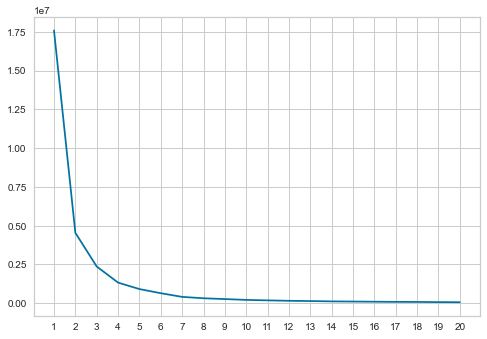

In [79]:
plt.plot(range(1,21),inertias)
plt.xticks(range(1,21));

##### This plot makes me doubt between 2 and 4, asi que voy a probar con el de silueta: 

##### Silhouette plot tells us that the maximum clustering score this values can get is at cluster 2 with 0.656 aprox (not very high)

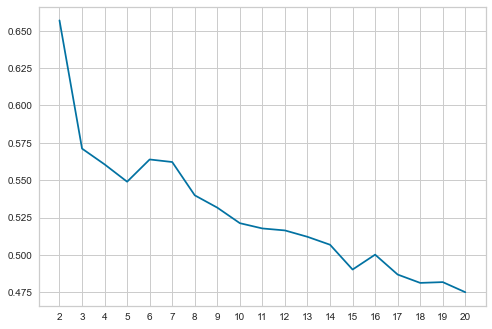

In [80]:
sil = [silhouette_score(X,model.labels_) for model in kmeans[1:]]
plt.plot(range(2,21),sil)
plt.xticks(range(2,21));

##### == From. the silhouette ploit,  seems 2 is the best cluster bnumber. Let´s see with 4 as well:

In [81]:
def Kmeans_sil_score(num):
    km = KMeans(n_clusters=num)
    km.fit(X)
    y_pred = km3.predict(X)
    return silhouette_score(X, y_pred)

In [94]:
def Kmeans_predx(X, num):
    km = KMeans(n_clusters=num)
    km.fit(X)
    return km3.predict(X)

In [82]:
Kmeans_sil_score(4)

0.5620323449580352

In [96]:
Kmeans_sil_score(2)

0.6568536504294319

In [99]:
y_pred2 = Kmeans_predx(X, 2)

## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

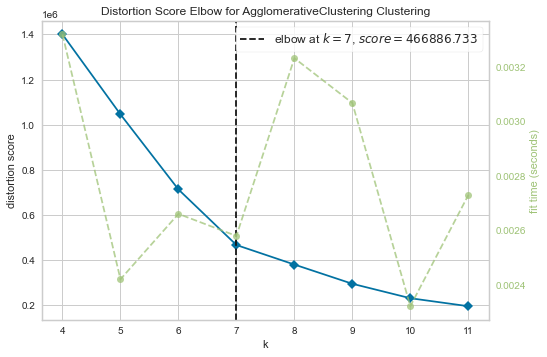

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(4, 12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

In [84]:
Kmeans_sil_score(7)

0.5616196384056903

###### KMeans result with the AggloClustering at 7, is actually not the highest in the KMeans model. KMeans model wins

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [102]:
clusters = pd.DataFrame(X, columns= X.columns)
clusters["cluster"] = y_pred2

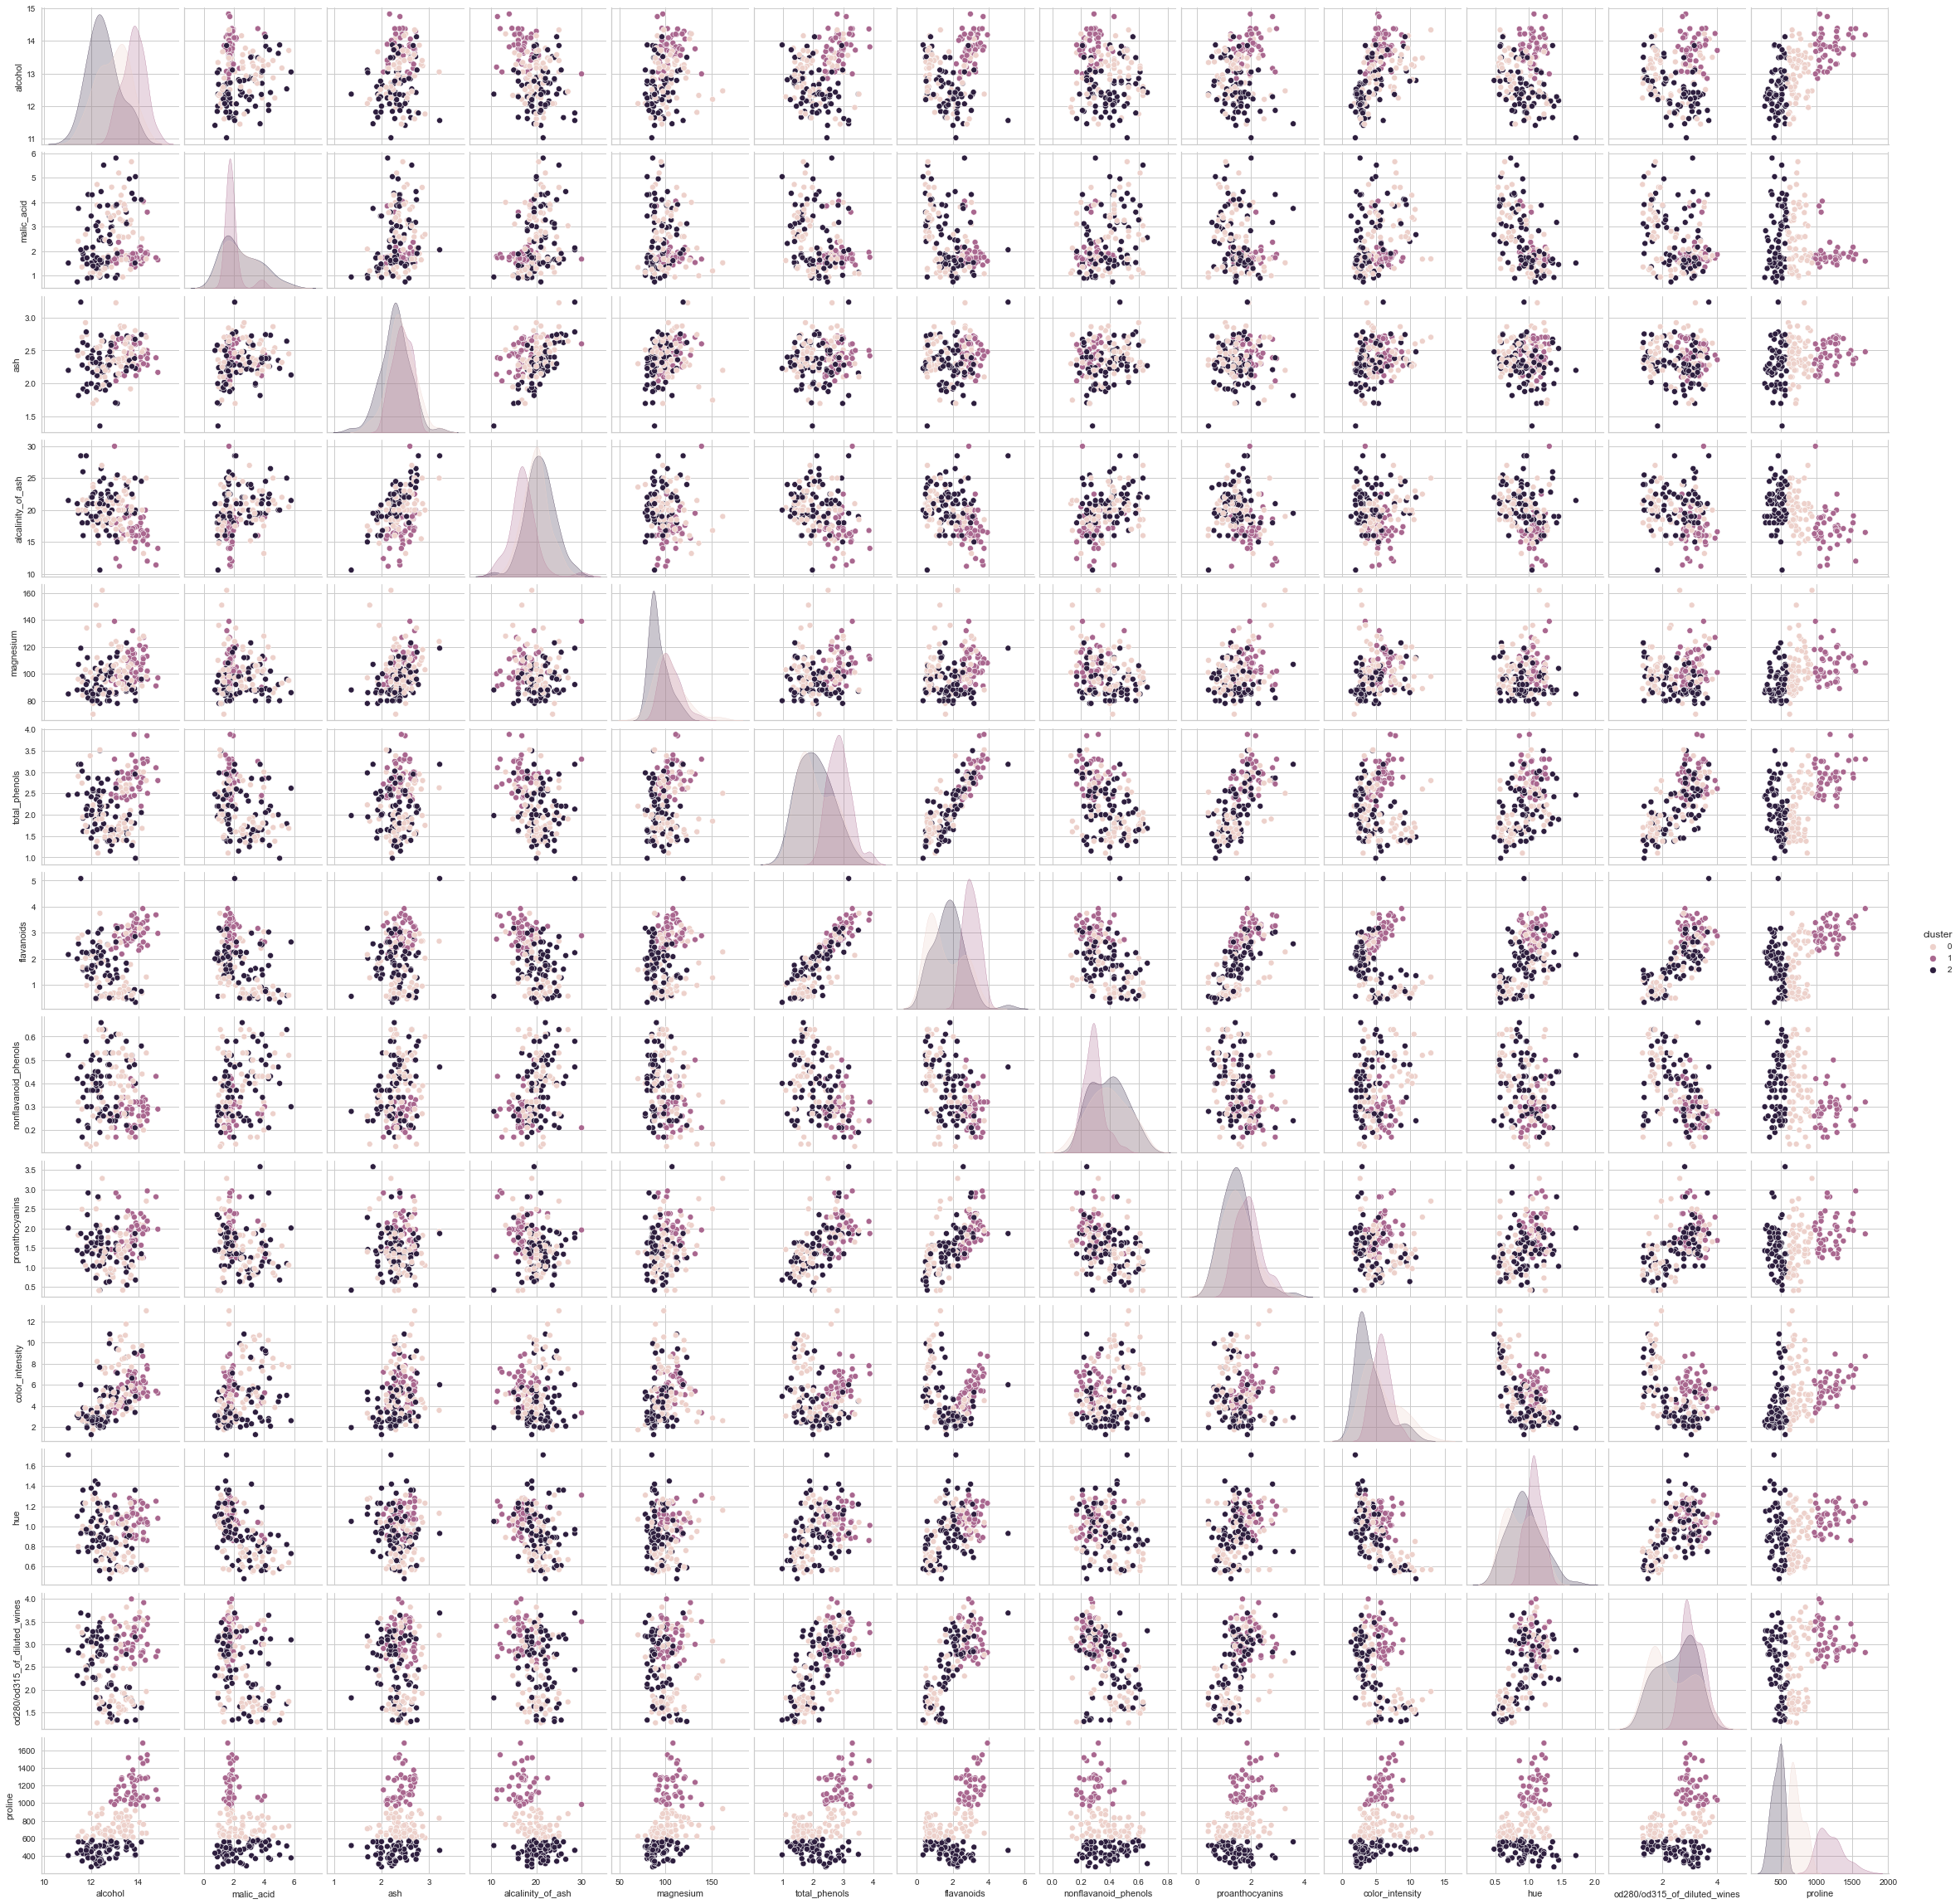

In [103]:
sns.pairplot(clusters, hue="cluster")

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(2)
pca_fited= pd.DataFrame(pca.fit_transform(X), columns=["PC1","PC2"])

In [111]:
pca_fited["cluster"] = clusters["cluster"]
pca_fited.head()

,PC1,PC2,cluster
0,318.562840,21.485963,1
1,303.097288,-5.368185,1
2,438.060924,-6.542579,1
3,733.239762,0.182551,1
4,-11.570310,18.502579,0


In [112]:
pca.explained_variance_ratio_

array([0.99808496, 0.00173622])

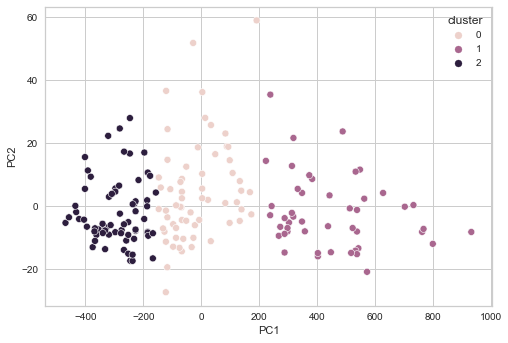

In [113]:
sns.scatterplot(x = pca_fited["PC1"],y = pca_fited["PC2"], hue=pca_fited["cluster"]);

## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.

In [114]:
from sklearn.manifold import TSNE

In [115]:
def tsne_perplexity(per):
    tsne= TSNE(n_components=2, preplexity=per, n_iter=1000, learning_rate=200)
    tsne_fited = pd.DataFrame(tsne.fit_transform(X))
    tsne_fited["cluster"] = clusters["cluster"]
    return 
    plt.title(f"Perplexity {i}")
    sns.scatterplot(x = data_tsne[0],y = data_tsne[1], hue=data_tsne["cluster"]);